In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [23]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
len(x_train)

60000

In [25]:
len(x_test)

10000

In [26]:
x_train[0].shape

(28, 28)

In [27]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

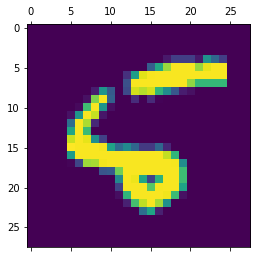

In [28]:
plt.matshow(x_test[8])

In [29]:
y_test[8]

5

In [30]:
x_train = x_train/255
x_test = x_test/255

In [31]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [32]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [33]:
x_train_flattened.shape

(60000, 784)

In [34]:
x_test_flattened.shape

(10000, 784)

## Handwritten digits classification using CNN

In [47]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [48]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential([
    layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1841 - accuracy: 0.9456
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0656 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0447 - accuracy: 0.9864
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0229 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0163 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [52]:
x_test = x_test.reshape(-1,28,28,1)

cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0560 - accuracy: 0.9867


[0.05603505298495293, 0.9866999983787537]

## Handwritten digits classification using ANN

In [84]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4256 - accuracy: 0.8950
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1941 - accuracy: 0.9447
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1464 - accuracy: 0.9586: 1s - loss: 0.151 - ETA: 0s - loss: 0.1
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1177 - accuracy: 0.9661
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0973 - accuracy: 0.9723


In [85]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.1070 - accuracy: 0.9666


[0.10704969614744186, 0.9666000008583069]

In [86]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.6911102e-06, 9.1709671e-07, 3.9371458e-05, 1.1492817e-04,
       3.8463781e-07, 6.3036159e-06, 6.5176525e-10, 3.4991646e-01,
       9.0299818e-07, 2.5812751e-05], dtype=float32)

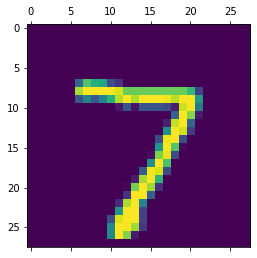

In [87]:
plt.matshow(x_test[0])

In [88]:
np.argmax(y_predicted[0])

7

In [89]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [90]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [91]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [92]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    1,    0,    2,    4,    3,    2,    0],
       [   0, 1119,    2,    1,    0,    1,    4,    2,    6,    0],
       [   6,    2,  981,    6,    4,    0,    4,   11,   16,    2],
       [   1,    0,    2,  983,    0,    1,    1,   10,   11,    1],
       [   1,    0,    3,    0,  951,    0,    5,    4,    2,   16],
       [   8,    1,    1,   19,    2,  843,    7,    1,    7,    3],
       [  11,    3,    1,    0,    2,    4,  930,    0,    7,    0],
       [   0,    4,    8,    3,    2,    1,    0, 1003,    1,    6],
       [   4,    3,    1,    6,    5,    5,    3,    7,  936,    4],
       [   3,    6,    0,    8,   15,    6,    1,   12,    5,  953]])>

Text(69.0, 0.5, 'Truth')

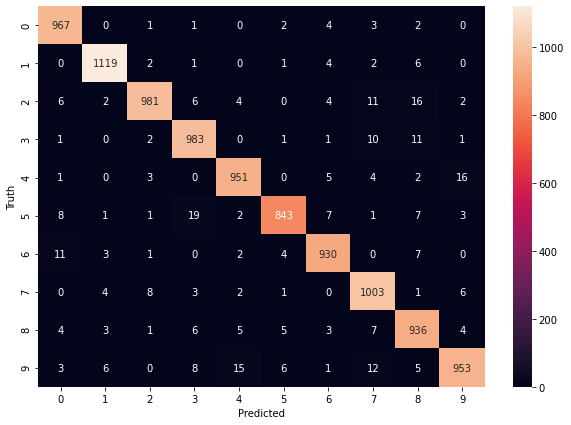

In [93]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')